In [1]:
import pandas as pd

In [2]:
A = pd.read_csv("E:/Data Science class/Datasets/Credit.csv")

In [3]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
B = A[["Income","Age"]]

In [5]:
B

,Income,Age
0,14.891,34
1,106.025,82
2,104.593,71
3,148.924,36
4,55.882,68
5,80.180,77
6,20.996,37
7,71.408,87
8,15.125,66
9,71.061,41


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C = pd.DataFrame(ss.fit_transform(B),columns=["Income","Age"])

In [7]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
model = agc.fit(C)

In [8]:
C['Cluster']=model.labels_

In [9]:
B['Cluster']=model.labels_

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
B

,Income,Age,Cluster
0,14.891,34,3
1,106.025,82,0
2,104.593,71,0
3,148.924,36,0
4,55.882,68,4
5,80.180,77,0
6,20.996,37,3
7,71.408,87,4
8,15.125,66,2
9,71.061,41,1


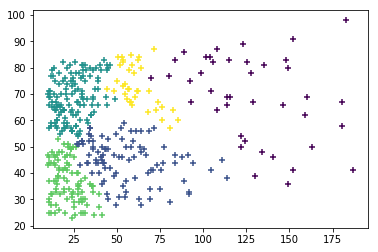

In [12]:
import matplotlib.pyplot as plt
plt.scatter(B['Income'],B['Age'],c=B.Cluster,marker="+")
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


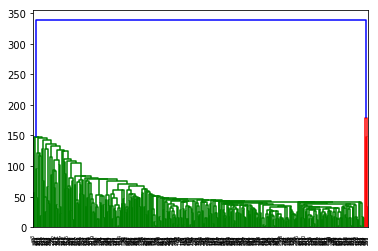

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
C = pd.DataFrame(distance_matrix(B.values, B.values), index=B.index, columns=B.index)
dist_mat = C
linkage_matrix = linkage(dist_mat)
dendrogram(linkage_matrix)
plt.show()